In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import random
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from pandas import datetime
from pandas import DataFrame
import matplotlib.pyplot as plt
from pandas import Series

from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from sklearn.model_selection import train_test_split

In [2]:
# dataset united kingdom
#case = pd.read_csv('UK/case.csv')
#mobility = pd.read_csv('UK/mobility.csv')
#case.set_index('date', inplace=True)
#mobility.set_index('date', inplace=True)

# dataset indonesia (jakarta)
case = pd.read_csv('data/new/case_maret_july.csv')
mobility = pd.read_csv('data/new/mobility_maret_july.csv')
weather = pd.read_csv('data/new/weather_maret_july.csv')
case.set_index('date', inplace=True)
#weather.set_index('date', inplace=True)
mobility.set_index('date', inplace=True)

In [3]:
new_weather = weather.interpolate(method='spline', order=2)
new_weather.head()

new_weather.set_index('date', inplace=True)

In [4]:
# Differencing order = 1
mobility_diff = mobility.diff(periods=1)
mobility_diff = mobility_diff.iloc[1:]

case_diff = case.diff(periods=1)
case_diff = case_diff.iloc[1:]

new_weather = new_weather.iloc[1:]
mobility_diff.head()

,retail_recreation,grocery_pahrmacy,parks,transit_station,workplace,residential
date,,,,,,
2020-03-19,-6.0,-9.0,-5.0,-6.0,-2.0,1.0
2020-03-20,-2.0,1.0,1.0,-4.0,-2.0,3.0
2020-03-21,-5.0,6.0,-6.0,2.0,13.0,-4.0
2020-03-22,-14.0,-17.0,-21.0,-9.0,-2.0,3.0
2020-03-23,9.0,3.0,16.0,-4.0,-22.0,4.0


In [5]:
data = pd.concat([case_diff, new_weather], axis=1)
data.head()

,case,rh,avt,mxt,mnt
date,,,,,
2020-03-19,12.0,83.0,28.1,31.4,25.800000
2020-03-20,-36.0,82.0,27.4,31.2,25.200000
2020-03-21,30.0,81.0,28.1,32.4,26.521978
2020-03-22,-8.0,84.0,27.2,31.2,25.000000
2020-03-23,15.0,81.0,28.2,31.8,25.000000


In [6]:
data.shape

(422, 5)

In [7]:
train = data[:412]
train_exog = mobility_diff[:412]
test = data[412:]
test_exog = mobility_diff[412:]

In [8]:
model = VARMAX(train, exog=train_exog, order=(3, 1))
model_fit = model.fit(disp=False)
print(model_fit.summary())

C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                                    Statespace Model Results                                   
Dep. Variable:     ['case', 'rh', 'avt', 'mxt', 'mnt']   No. Observations:                  412
Model:                                     VARMAX(3,1)   Log Likelihood               -5146.701
                                           + intercept   AIC                          10593.403
Date:                                 Tue, 24 Aug 2021   BIC                          11196.556
Time:                                         12:20:22   HQIC                         10831.980
Sample:                                     03-19-2020                                         
                                          - 05-04-2021                                         
Covariance Type:                                   opg                                         
Ljung-Box (L1) (Q):      0.03, 0.08, 0.01, 0.00, 0.00   Jarque-Bera (JB):   376.04, 4.47, 5.89, 11.32, 6.36
Prob(Q):                 0.8

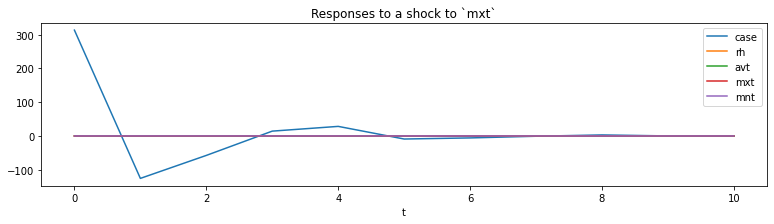

In [9]:
ax = model_fit.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `mxt`');

In [10]:
yhat = model_fit.forecast(steps=len(test_exog),exog=test_exog)
print(yhat)

                  case         rh        avt        mxt        mnt
2021-05-05  156.934097  73.550585  29.410379  33.450209  26.538010
2021-05-06  230.864907  75.748391  29.070072  32.767579  26.180461
2021-05-07  -81.422000  75.146767  29.111182  32.666246  26.135580
2021-05-08 -165.233414  75.483652  29.071033  33.161520  26.436743
2021-05-09   17.392304  76.256997  28.935242  32.839001  26.277684
2021-05-10  101.740786  74.495980  29.050778  32.706389  25.877418
2021-05-11  -63.979959  74.922223  29.071444  32.998227  26.271762
2021-05-12   50.362794  75.118832  28.998336  32.824321  26.244609
2021-05-13  288.111553  74.348376  28.521628  32.179024  25.873048
2021-05-14 -211.222423  74.534413  28.917663  32.698277  26.063363


C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)
C:\ProgramData\Anaconda3\envs\Forecatsing\lib\site-packages\statsmodels\tsa\statespace\varmax.py:163: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  EstimationWarning)


In [11]:
list_hasil = yhat['case'].tolist()
list_eval = test['case'].tolist()

In [12]:
rms = mean_squared_error(list_eval, list_hasil, squared=False)
rms

169.4657766912383

In [13]:
mse = mean_squared_error(list_eval, list_hasil)
mse

28718.64946956464

In [14]:
mae = mean_absolute_error(list_eval, list_hasil)
mae

151.5081929285032